In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [2]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2019-08-02 13:57:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   103MB/s    in 0.6s    

2019-08-02 13:57:46 (103 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

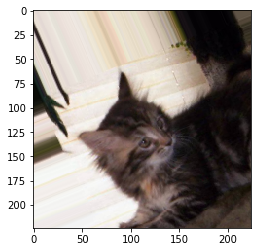

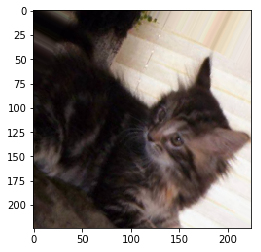

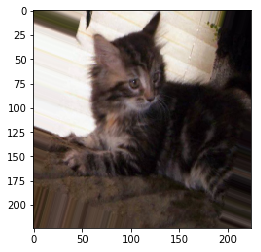

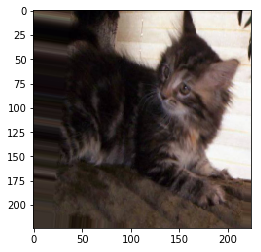

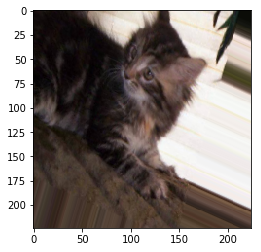

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(224, 224))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

In [7]:
v1 = layers.Input(shape=(224, 224, 3))

# 1st Layer
conv_1 = layers.Conv2D(96, (11, 11), strides=(4,4), padding='valid')(v1)
conv_1 = layers.Activation('relu')(conv_1)
conv_1 = layers.BatchNormalization()(conv_1)  
conv_1 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid')(conv_1)
 
    # 2nd Layer
conv_2 = layers.Conv2D(256, (5, 5))(conv_1)
conv_2 = layers.Activation('relu')(conv_2)
conv_2 = layers.BatchNormalization()(conv_2)
conv_2 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(conv_2)

    # 3rd Layer
conv_3 = layers.Conv2D(384, (3, 3))(conv_2)
    # conv_3 = BatchNormalization()(conv_3)
conv_3 = layers.Activation('relu')(conv_3)
    # conv_3 = MaxPooling2D((3, 3))(conv_3)

    # 4th Layer
conv_4 = layers.Conv2D(384, (3, 3))(conv_3)
    # conv_4 = BatchNormalization()(conv_4)
conv_4 = layers.Activation('relu')(conv_4)
    # conv_4 = MaxPooling2D((3, 3))(conv_4)

    # 5th Layer
conv_5 = layers.Conv2D(256, (3, 3))(conv_4)
conv_5 = layers.Activation('relu')(conv_5)
conv_5 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(conv_5)
    
    # Flatten Layer
f = layers.Flatten()(conv_5)

    # 6th Layer
dense_1 = layers.Dense(4096)(f)
    # dense_1 = BatchNormalization()(dense_1)
dense_1 = layers.Activation('relu')(dense_1)
drop_1  = layers.Dropout(0.4)(dense_1)

    # 7th Layer
dense_2 = layers.Dense(4096)(drop_1)
    # dense_2 = BatchNormalization()(dense_2)
dense_2 = layers.Activation('relu')(dense_2)
drop_2  = layers.Dropout(0.4)(dense_2)

dense_3 = layers.Dense(1)(drop_2)

predictions = layers.Activation('sigmoid')(dense_3)

model = Model(inputs=v1, outputs=predictions)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


W0802 13:57:53.683712 139768597264256 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0802 13:57:54.220803 139768597264256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0     

In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
100/100 - 233s - loss: 2.5160 - acc: 0.5095 - val_loss: 0.6928 - val_acc: 0.5160
Epoch 2/30
100/100 - 229s - loss: 0.7582 - acc: 0.5085 - val_loss: 0.7329 - val_acc: 0.5320
Epoch 3/30
100/100 - 228s - loss: 0.7851 - acc: 0.5255 - val_loss: 0.7291 - val_acc: 0.5000
Epoch 4/30
100/100 - 230s - loss: 0.7612 - acc: 0.5425 - val_loss: 0.6899 - val_acc: 0.5360
Epoch 5/30
100/100 - 229s - loss: 0.7218 - acc: 0.5210 - val_loss: 0.7188 - val_acc: 0.5000
Epoch 6/30
100/100 - 228s - loss: 0.7138 - acc: 0.5320 - val_loss: 0.6975 - val_acc: 0.5400
Epoch 7/30
100/100 - 229s - loss: 0.7164 - acc: 0.5510 - val_loss: 0.6901 - val_acc: 0.5390
Epoch 8/30
100/100 - 230s - loss: 0.7168 - acc: 0.5425 - val_loss: 0.7417 - val_acc: 0.5400
Epoch 9/30
100/100 - 229s - loss: 0.7077 - acc: 0.6055 - val_loss: 0.7022 - val_acc: 0.4980
Epoch 10/30
100/100 - 228s - loss: 0.7010 - acc: 0.5830 - val_loss: 0.6903 - val_acc: 0.5050
Epoch 11/30
100/100 - 227s - loss: 0.6907 - acc: 0.6150 - val_loss: 0.6675 - va

Text(0.5, 1.0, 'Training and validation loss')

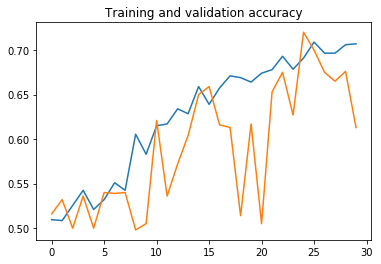

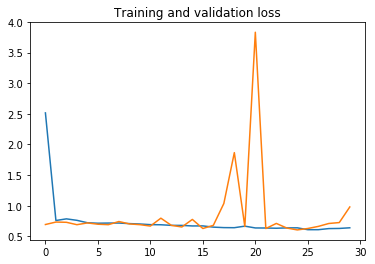

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)